simulating 426 neurons. Start: Thu Dec  1 11:11:16 2022


clang-13: error: the clang compiler does not support '-march=native'
WARNING    Cannot use Cython, a test compilation failed: command '/Users/minsu/miniforge3/envs/bmnn2/bin/arm64-apple-darwin20.0.0-clang' failed with exit code 1 (CompileError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]
INFO       width adjusted from 2. ms to 2.1 ms [brian2.monitors.ratemonitor.adjusted_width]


sim end: Thu Dec  1 11:11:33 2022


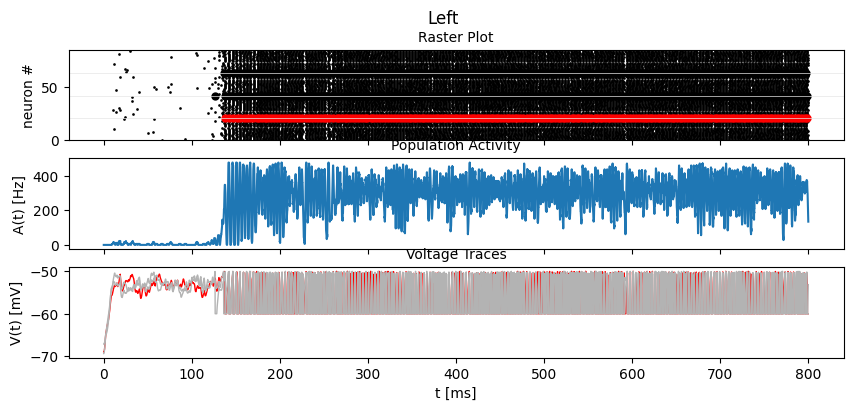

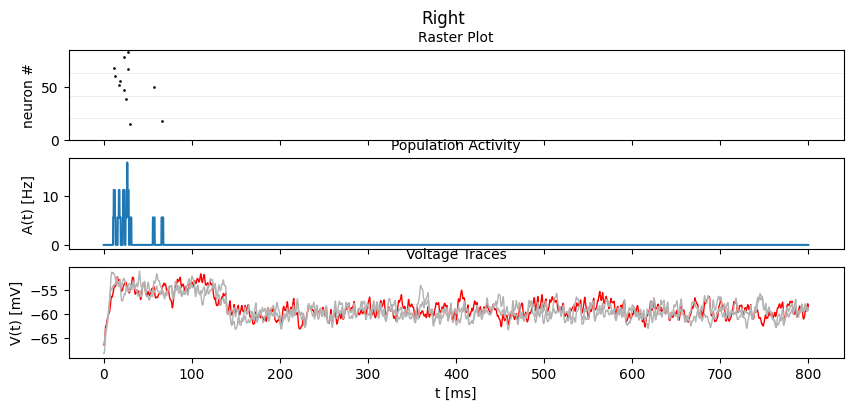

In [1]:
import wang

import brian2 as b2
from neurodynex3.tools import plot_tools
from neurodynex3.competing_populations import decision_making
import matplotlib.pyplot as plt


stim_start = 100. * b2.ms
stim_duration = 700 * b2.ms

pop_rate_list = []


results = wang.sim_decision_making_network(N_Excit=341, N_Inhib=85, weight_scaling_factor=6.0,
                                        t_stimulus_start=stim_start, t_stimulus_duration=stim_duration,
                                        coherence_level=+0.90, w_pos=5, mu0_mean_stimulus_Hz=500 * b2.Hz,
                                        max_sim_time=800. * b2.ms)




plot_tools.plot_network_activity(results["rate_monitor_A"], results["spike_monitor_A"],
                                 results["voltage_monitor_A"], t_min=0. * b2.ms, avg_window_width=2. * b2.ms,
                                 sup_title="Left")
plot_tools.plot_network_activity(results["rate_monitor_B"], results["spike_monitor_B"],
                                 results["voltage_monitor_B"], t_min=0. * b2.ms, avg_window_width=2. * b2.ms,
                                 sup_title="Right")
plt.show() 

In [2]:
import numpy as np


In [3]:
def plot_rate(pop_rate):
    rate_a = pop_rate['pop_rate_a']
    rate_b = pop_rate['pop_rate_b']
    time = pop_rate['time']
    plt.rcParams['font.size'] = 18

    
    
    plt.plot(time, rate_a,  linewidth= 2.5)
    plt.plot(time, rate_b, linewidth= 2.5)
    plt.ylabel('Firing rate (Spikes/s)')
    plt.xlabel('time (ms)')
    plt.legend(['Population A', 'Population B'])
    plt.show()

In [4]:
def pop_rate_to_dict(results):

    pop_rate_a = results["rate_monitor_A"]
    pop_rate_b = results["rate_monitor_B"]
    
    # pop_rate_a is a 

    smooth_pop_rate_a = pop_rate_a.smooth_rate(window="flat",width = 20.1*b2.ms )
    smooth_pop_rate_b = pop_rate_b.smooth_rate(window="flat",width = 20.1*b2.ms )

    np_rate_a = np.array(smooth_pop_rate_a)
    np_rate_b = np.array(smooth_pop_rate_b)



    time = pop_rate_a.t/b2.ms
    pop_rate_results = {}

    pop_rate_results['time'] =  time
    pop_rate_results['pop_rate_a'] =  np_rate_a
    pop_rate_results['pop_rate_b'] =  np_rate_b
    pop_rate_results['stim_info'] = '100ms to 800ms for 700 ms'
    
    return pop_rate_results

In [12]:
def w_pos_diff(w_pos_value):
    results = wang.sim_decision_making_network(N_Excit=341, N_Inhib=85, weight_scaling_factor=6.0,
                                    t_stimulus_start=stim_start, t_stimulus_duration=stim_duration,
                                    coherence_level=+0.90, w_pos=w_pos_value, mu0_mean_stimulus_Hz=500 * b2.Hz,
                                    max_sim_time=800. * b2.ms)




    plot_tools.plot_network_activity(results["rate_monitor_A"], results["spike_monitor_A"],
                                results["voltage_monitor_A"], t_min=0. * b2.ms, avg_window_width=2. * b2.ms,
                                sup_title="Left")
    plot_tools.plot_network_activity(results["rate_monitor_B"], results["spike_monitor_B"],
                                results["voltage_monitor_B"], t_min=0. * b2.ms, avg_window_width=2. * b2.ms,
                                sup_title="Right")
    plt.show()

simulating 426 neurons. Start: Thu Dec  1 11:11:56 2022
sim end: Thu Dec  1 11:12:12 2022


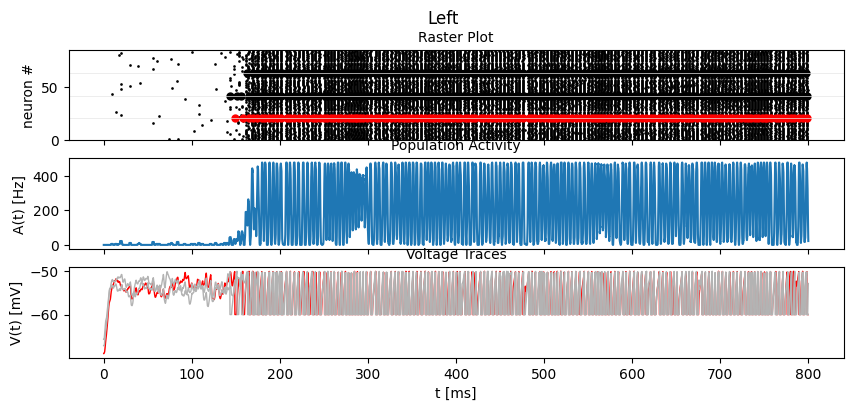

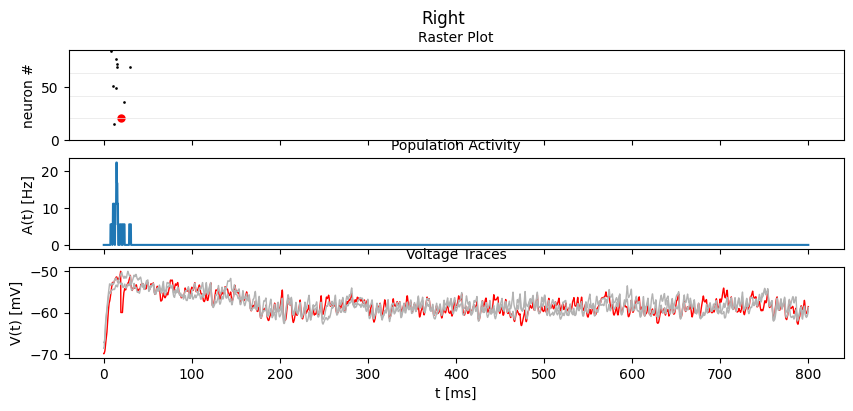

In [6]:
w_pos_diff(4.1)


simulating 426 neurons. Start: Thu Dec  1 11:12:12 2022
sim end: Thu Dec  1 11:12:28 2022


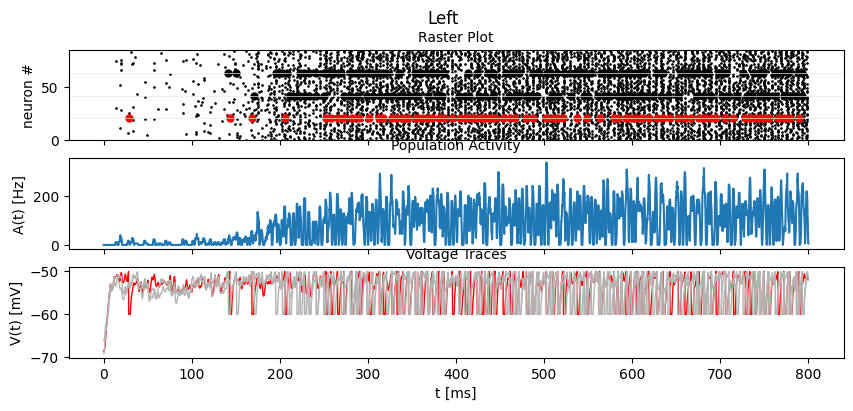

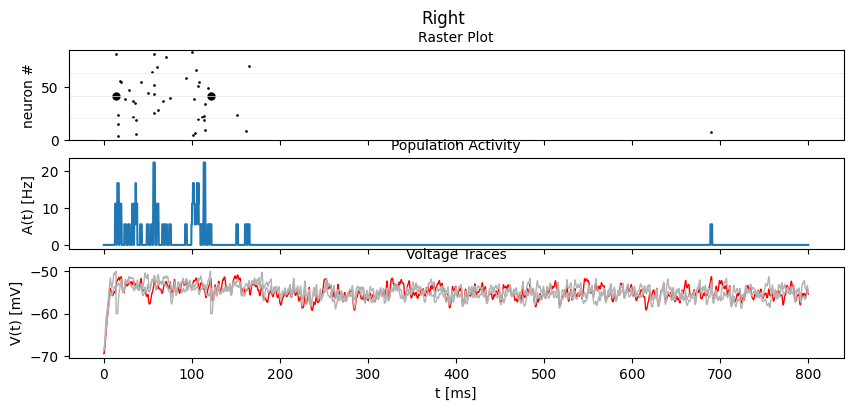

In [7]:
w_pos_diff(2.2)


simulating 426 neurons. Start: Thu Dec  1 11:12:29 2022
sim end: Thu Dec  1 11:12:44 2022


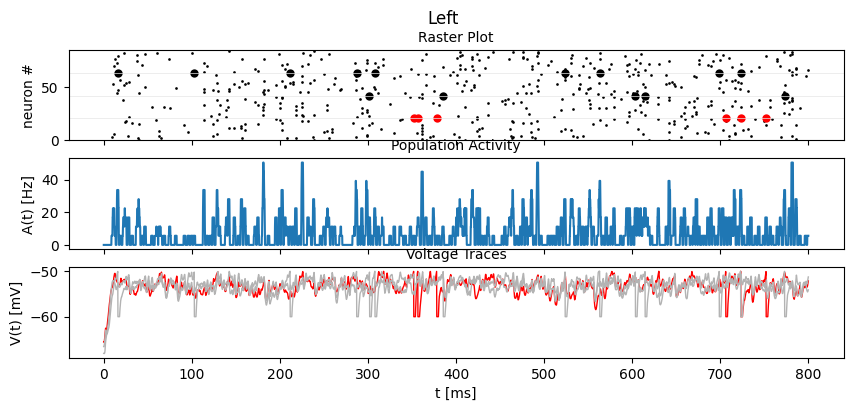

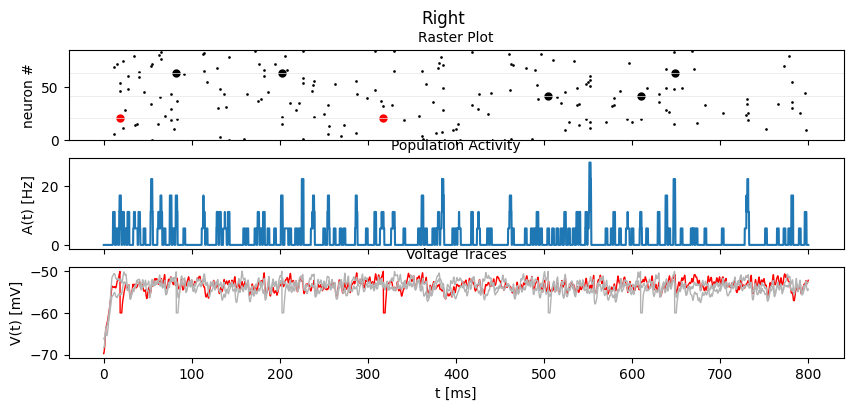

In [8]:
w_pos_diff(1.2)


In [42]:
stim_start = 100. * b2.ms
stim_duration = 700 * b2.ms



def network_sim(w_pos_value, s_durantion):


    stim_start = 100. * b2.ms

    
    stim_duration = s_durantion* b2.ms


    results = wang.sim_decision_making_network(N_Excit=341, N_Inhib=85, weight_scaling_factor=6.0,
                                    t_stimulus_start=stim_start, t_stimulus_duration=stim_duration,
                                    coherence_level=+0.90, w_pos=w_pos_value, mu0_mean_stimulus_Hz=500 * b2.Hz,
                                    max_sim_time=1000. * b2.ms)




    plot_tools.plot_network_activity(results["rate_monitor_A"], results["spike_monitor_A"],
                                results["voltage_monitor_A"], t_min=0. * b2.ms, avg_window_width=2. * b2.ms,
                                sup_title="Left")
    plot_tools.plot_network_activity(results["rate_monitor_B"], results["spike_monitor_B"],
                                results["voltage_monitor_B"], t_min=0. * b2.ms, avg_window_width=2. * b2.ms,
                                sup_title="Right")
    plt.show() 
    
    return results

simulating 426 neurons. Start: Thu Dec  1 11:12:45 2022
sim end: Thu Dec  1 11:13:00 2022


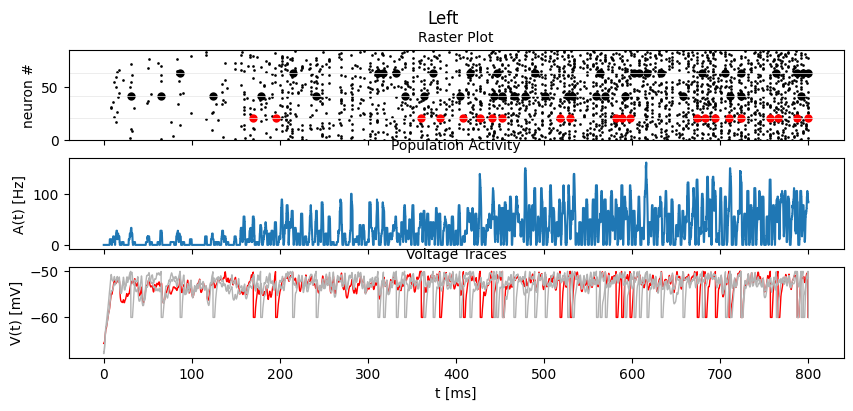

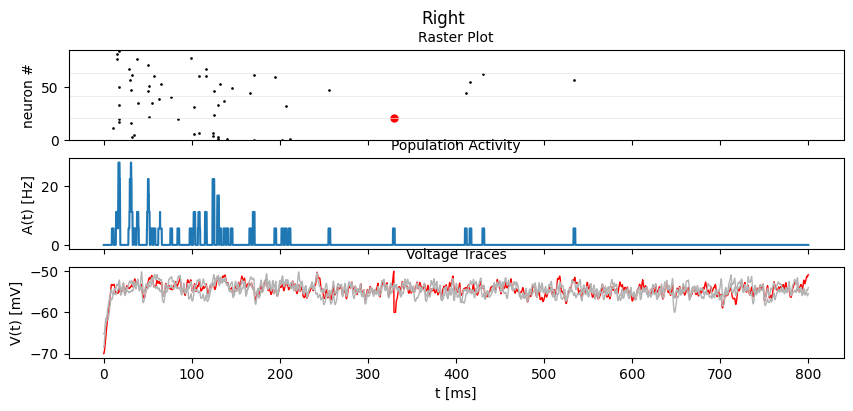

In [10]:
results = network_sim(2.0, 100)


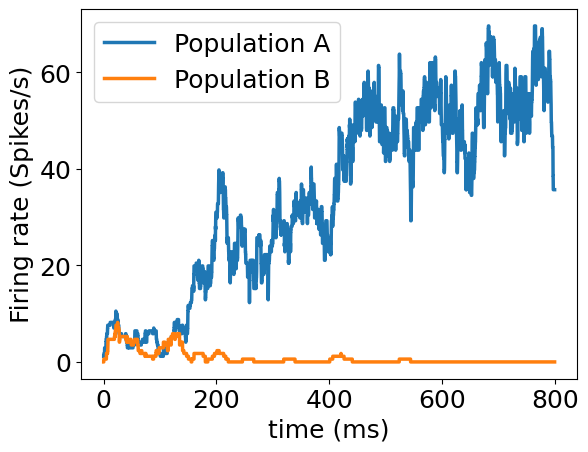

In [13]:
results_pop = pop_rate_to_dict(results)
plot_rate(results_pop)

In [14]:
pop_rate = pop_rate_to_dict(results)

In [16]:
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")


In [22]:
plt.style.use("./nma.mplstyle")


simulating 426 neurons. Start: Thu Dec  1 11:30:51 2022
sim end: Thu Dec  1 11:31:06 2022


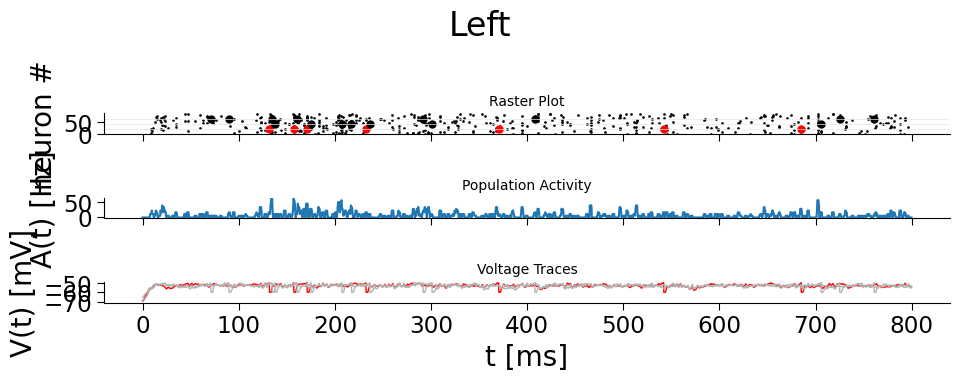

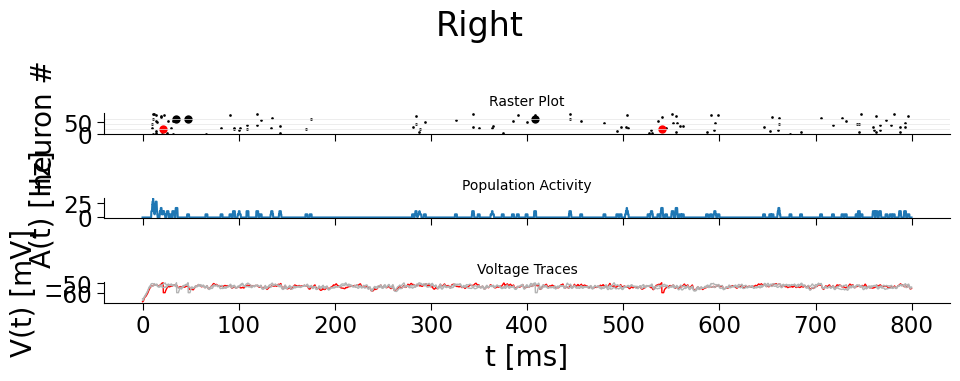

In [26]:
results = network_sim(1.7, 100)


In [27]:
results = network_sim(1.7, 100)
pop_rate = pop_rate_to_dict(results)



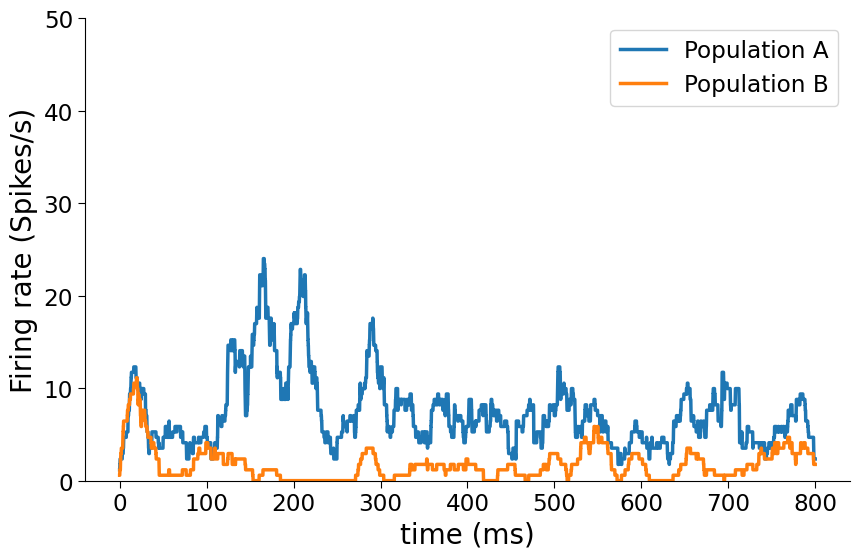

In [29]:
rate_a = pop_rate['pop_rate_a']
rate_b = pop_rate['pop_rate_b']
time = pop_rate['time']

plt.rcParams['font.size'] = 20
plt.plot(time, rate_a,  linewidth= 2.5)
plt.plot(time, rate_b, linewidth= 2.5)
plt.ylabel('Firing rate (Spikes/s)')
plt.xlabel('time (ms)')
plt.legend(['Population A', 'Population B'])
plt.ylim([0, 50])
plt.savefig("figure3_firing_pattern.svg", transparent=True)

plt.show()

simulating 426 neurons. Start: Thu Dec  1 11:35:33 2022
sim end: Thu Dec  1 11:35:48 2022


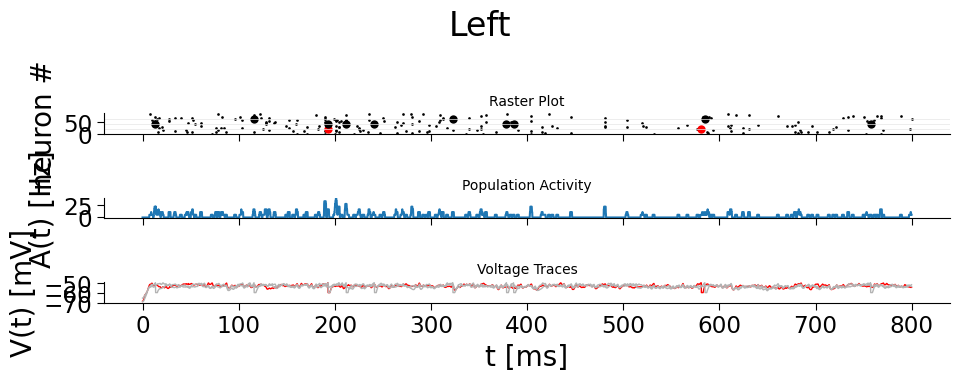

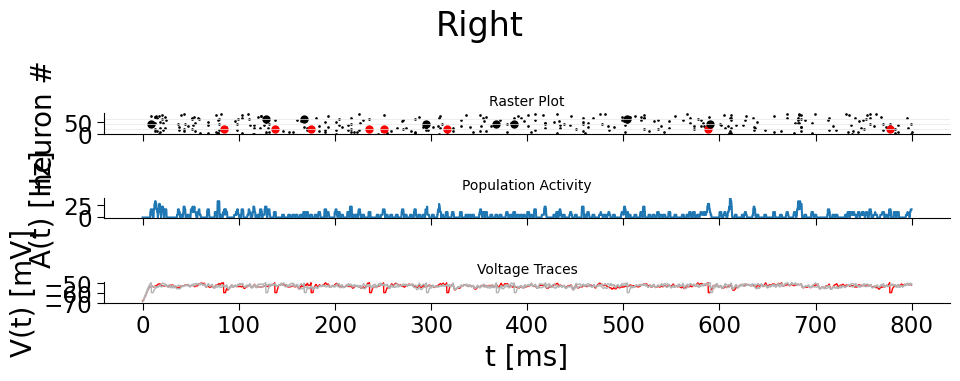

In [30]:
results = network_sim(2.0, 100)
pop_rate = pop_rate_to_dict(results)


simulating 426 neurons. Start: Thu Dec  1 11:43:37 2022
sim end: Thu Dec  1 11:43:57 2022


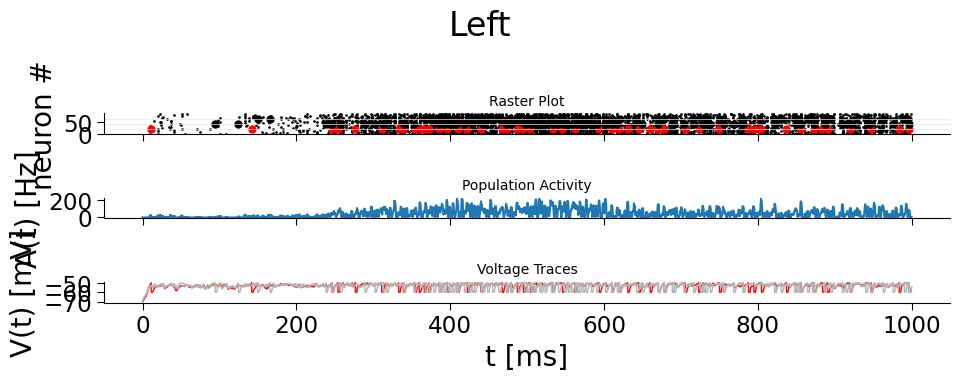

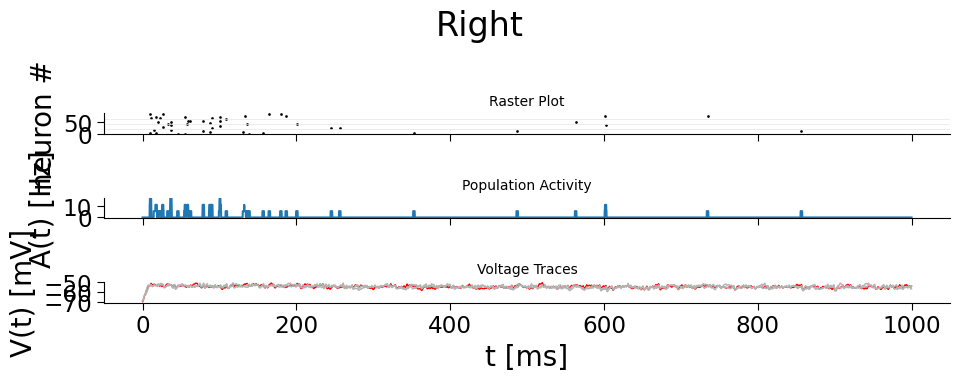

In [43]:
results = network_sim(2.0, 500)
pop_rate = pop_rate_to_dict(results)


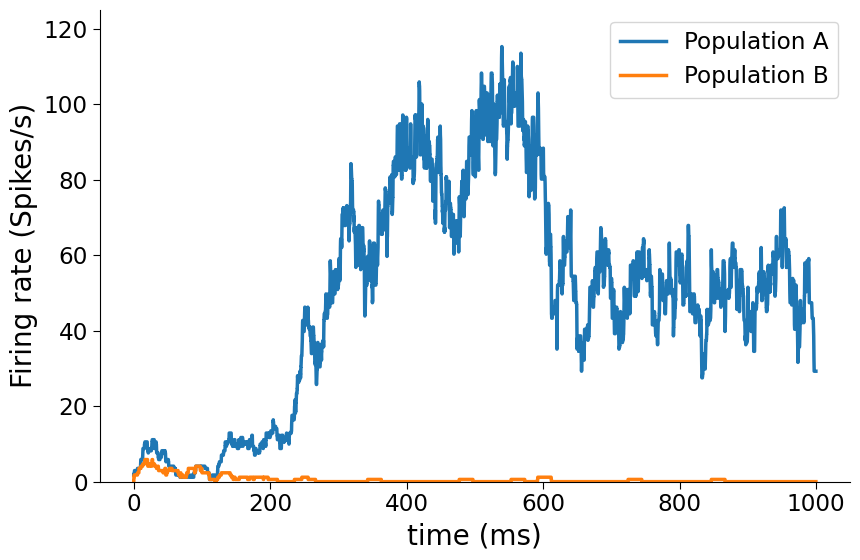

In [46]:
rate_a = pop_rate['pop_rate_a']
rate_b = pop_rate['pop_rate_b']
time = pop_rate['time']

plt.rcParams['font.size'] = 20
plt.plot(time, rate_a,  linewidth= 2.5)
plt.plot(time, rate_b, linewidth= 2.5)
plt.ylabel('Firing rate (Spikes/s)')
plt.xlabel('time (ms)')
plt.legend(['Population A', 'Population B'])
plt.ylim([0, 125])
plt.savefig("figure3_firing_pattern.svg", transparent=True)

plt.show()

simulating 426 neurons. Start: Thu Dec  1 13:00:58 2022
sim end: Thu Dec  1 13:01:17 2022


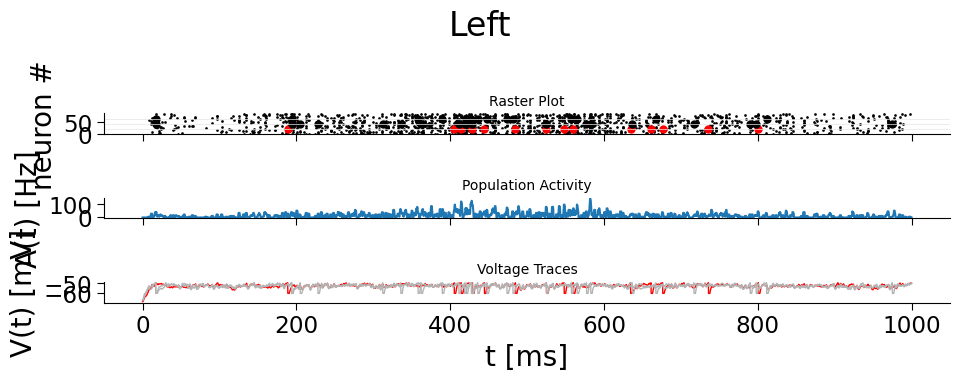

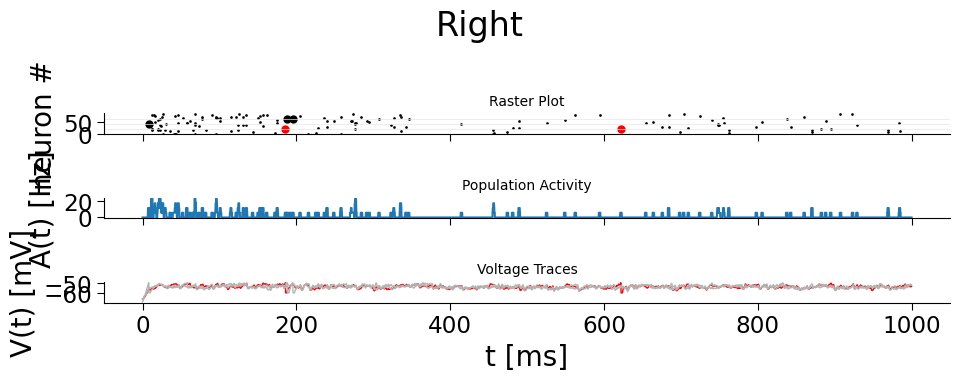

In [60]:
results = network_sim(1.7, 500)
pop_rate = pop_rate_to_dict(results)


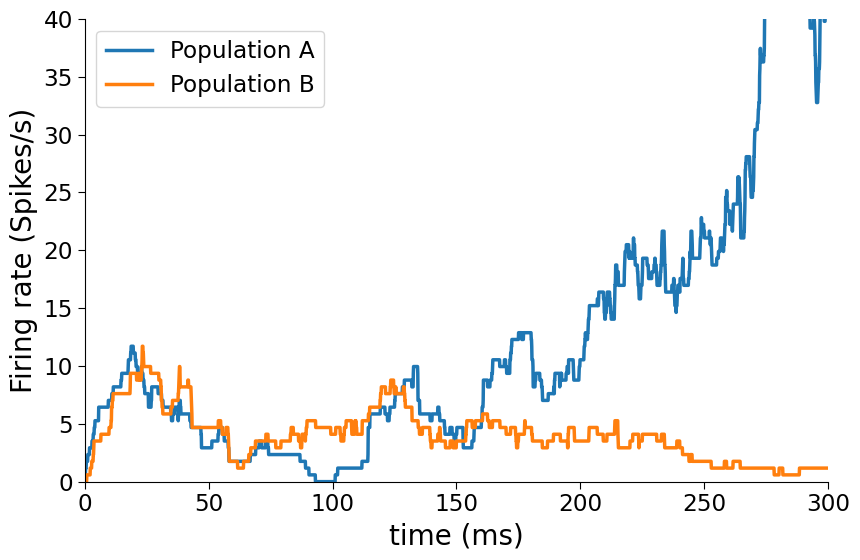

In [71]:
rate_a = pop_rate['pop_rate_a']
rate_b = pop_rate['pop_rate_b']
time = pop_rate['time']

plt.rcParams['font.size'] = 20
plt.plot(time, rate_a,  linewidth= 2.5)
plt.plot(time, rate_b, linewidth= 2.5)
plt.ylabel('Firing rate (Spikes/s)')
plt.xlabel('time (ms)')
plt.legend(['Population A', 'Population B'])
plt.ylim([0, 40])
plt.xlim([0, 300])

plt.savefig("figure3_firing_pattern_w_pos_1p7.pdf", transparent=True)

plt.show()

simulating 426 neurons. Start: Thu Dec  1 13:53:46 2022
sim end: Thu Dec  1 13:54:07 2022


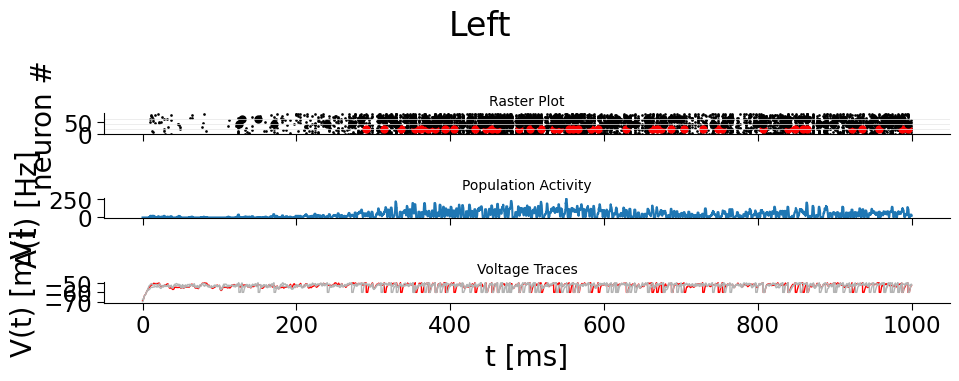

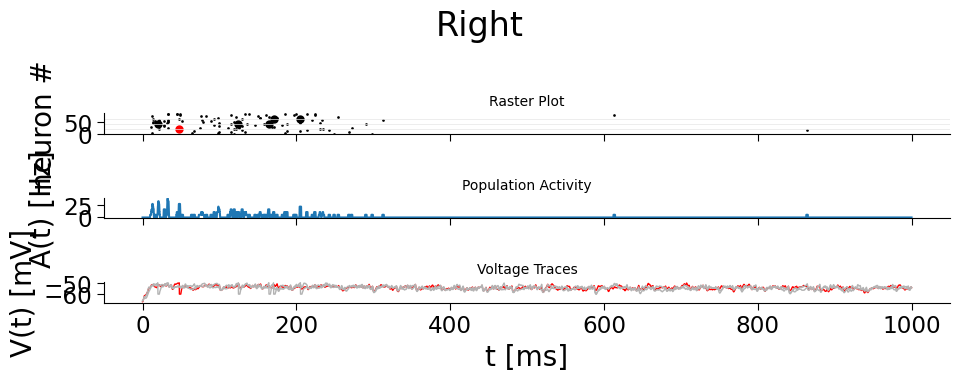

In [68]:
results = network_sim(2.0, 500)
pop_rate = pop_rate_to_dict(results)

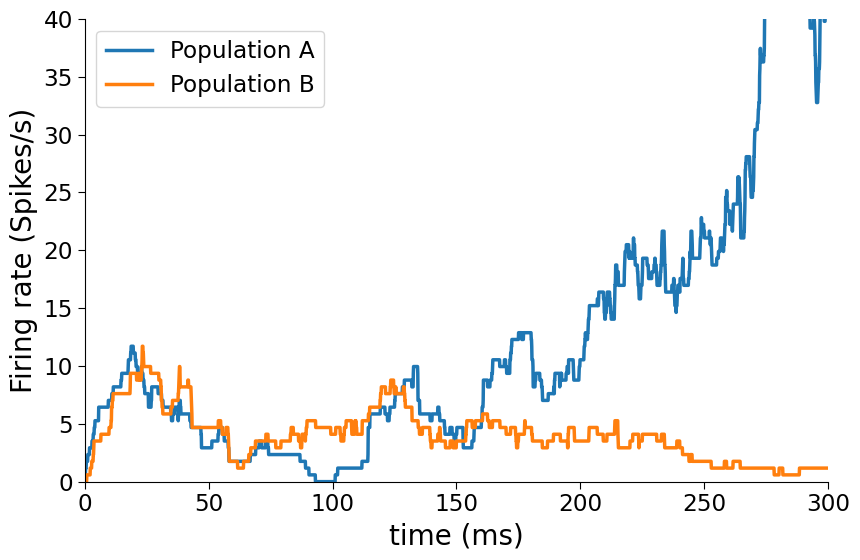

In [70]:
rate_a = pop_rate['pop_rate_a']
rate_b = pop_rate['pop_rate_b']
time = pop_rate['time']

plt.rcParams['font.size'] = 20
plt.plot(time, rate_a,  linewidth= 2.5)
plt.plot(time, rate_b, linewidth= 2.5)
plt.ylabel('Firing rate (Spikes/s)')
plt.xlabel('time (ms)')
plt.legend(['Population A', 'Population B'])
plt.ylim([0, 40])
plt.xlim([0, 300])

plt.savefig("figure3_firing_pattern_w_pos_1p7.pdf", transparent=True)

plt.show()